In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# DATA PREPROCESSING
df_r = pd.read_csv('E:\DataforLab/toyota.csv')
df_r = df_r.drop(columns=['model'])
df_r.head(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [2]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6738 non-null   int64  
 1   price         6738 non-null   int64  
 2   transmission  6738 non-null   object 
 3   mileage       6738 non-null   int64  
 4   fuelType      6738 non-null   object 
 5   tax           6738 non-null   int64  
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 421.2+ KB


In [23]:
# DATA PREPROCESSING

df_f_col = list(['transmission','fuelType'])
df_c = df_r.copy()
df_c = df_c[df_c['fuelType'] != 'Other']

print(df_c['fuelType'].unique())

for col in df_f_col:
    i = 0
    unique = df_c[col].unique()

    for to_replace_val in unique:
        df_c[col] = df_c[col].replace(to_replace=to_replace_val, value=i, regex=True)
        i = i+1
    df_c[col] = df_c[col].astype("int32")

df_c.head(10)
#df_f_col = df_f.columns
#print(df_f_col)

['Petrol' 'Hybrid' 'Diesel']


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,0,24089,0,265,36.2,2.0
1,2017,15995,0,18615,0,145,36.2,2.0
2,2015,13998,0,27469,0,265,36.2,2.0
3,2017,18998,0,14736,0,150,36.2,2.0
4,2017,17498,0,36284,0,145,36.2,2.0
5,2017,15998,0,26919,0,260,36.2,2.0
6,2017,18522,0,10456,0,145,36.2,2.0
7,2017,18995,0,12340,0,145,36.2,2.0
8,2020,27998,0,516,0,150,33.2,2.0
9,2016,13990,0,37999,0,265,36.2,2.0


In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6633 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6633 non-null   int64  
 1   price         6633 non-null   int64  
 2   transmission  6633 non-null   int32  
 3   mileage       6633 non-null   int64  
 4   fuelType      6633 non-null   int32  
 5   tax           6633 non-null   int64  
 6   mpg           6633 non-null   float64
 7   engineSize    6633 non-null   float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 414.6 KB


                  year     price  transmission   mileage  fuelType       tax  \
year          1.000000  0.421486     -0.000753 -0.728932 -0.118333  0.280721   
price         0.421486  1.000000      0.494779 -0.299421  0.483297  0.214802   
transmission -0.000753  0.494779      1.000000  0.005161  0.391007 -0.106472   
mileage      -0.728932 -0.299421      0.005161  1.000000  0.273588 -0.202884   
fuelType     -0.118333  0.483297      0.391007  0.273588  1.000000 -0.050092   
tax           0.280721  0.214802     -0.106472 -0.202884 -0.050092  1.000000   
mpg          -0.024955 -0.050065      0.248841  0.045840  0.222475 -0.446990   
engineSize   -0.046633  0.727173      0.455283  0.182125  0.705318  0.157717   

                   mpg  engineSize  
year         -0.024955   -0.046633  
price        -0.050065    0.727173  
transmission  0.248841    0.455283  
mileage       0.045840    0.182125  
fuelType      0.222475    0.705318  
tax          -0.446990    0.157717  
mpg           1.0000

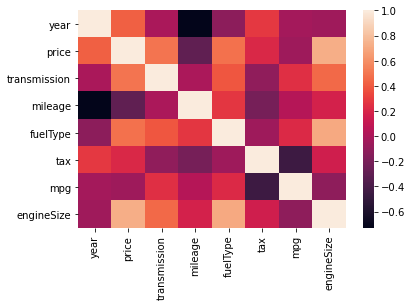

In [14]:
# CORRELATION MATRIX, HEATMAP
from sklearn.preprocessing import LabelEncoder, StandardScaler

corr = df_c.corr()
print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

U = df_c.fuelType
X = df_c.drop(['fuelType','mileage','tax'], axis=1)
    
X_train_, X_test_, y_train, y_test = train_test_split(X, U, test_size=0.5, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train_)

X_train = scaler.transform(X_train_) 
X_test = scaler.transform(X_test_)

print(X_train, "Y = ", y_train)
print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
print(X_test, "Y = ", y_test)
print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

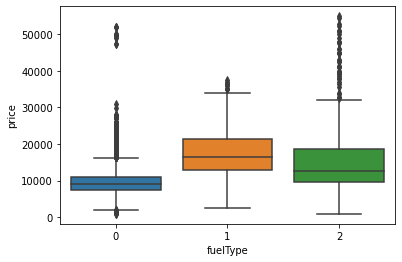

In [15]:
# BOXPLOT

import seaborn as sns

ax = sns.boxplot(x='fuelType', y='price', data=df_c)

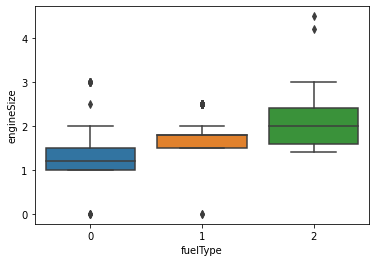

In [16]:
# BOXPLOT
bx = sns.boxplot(x='fuelType', y='engineSize', data=df_c)

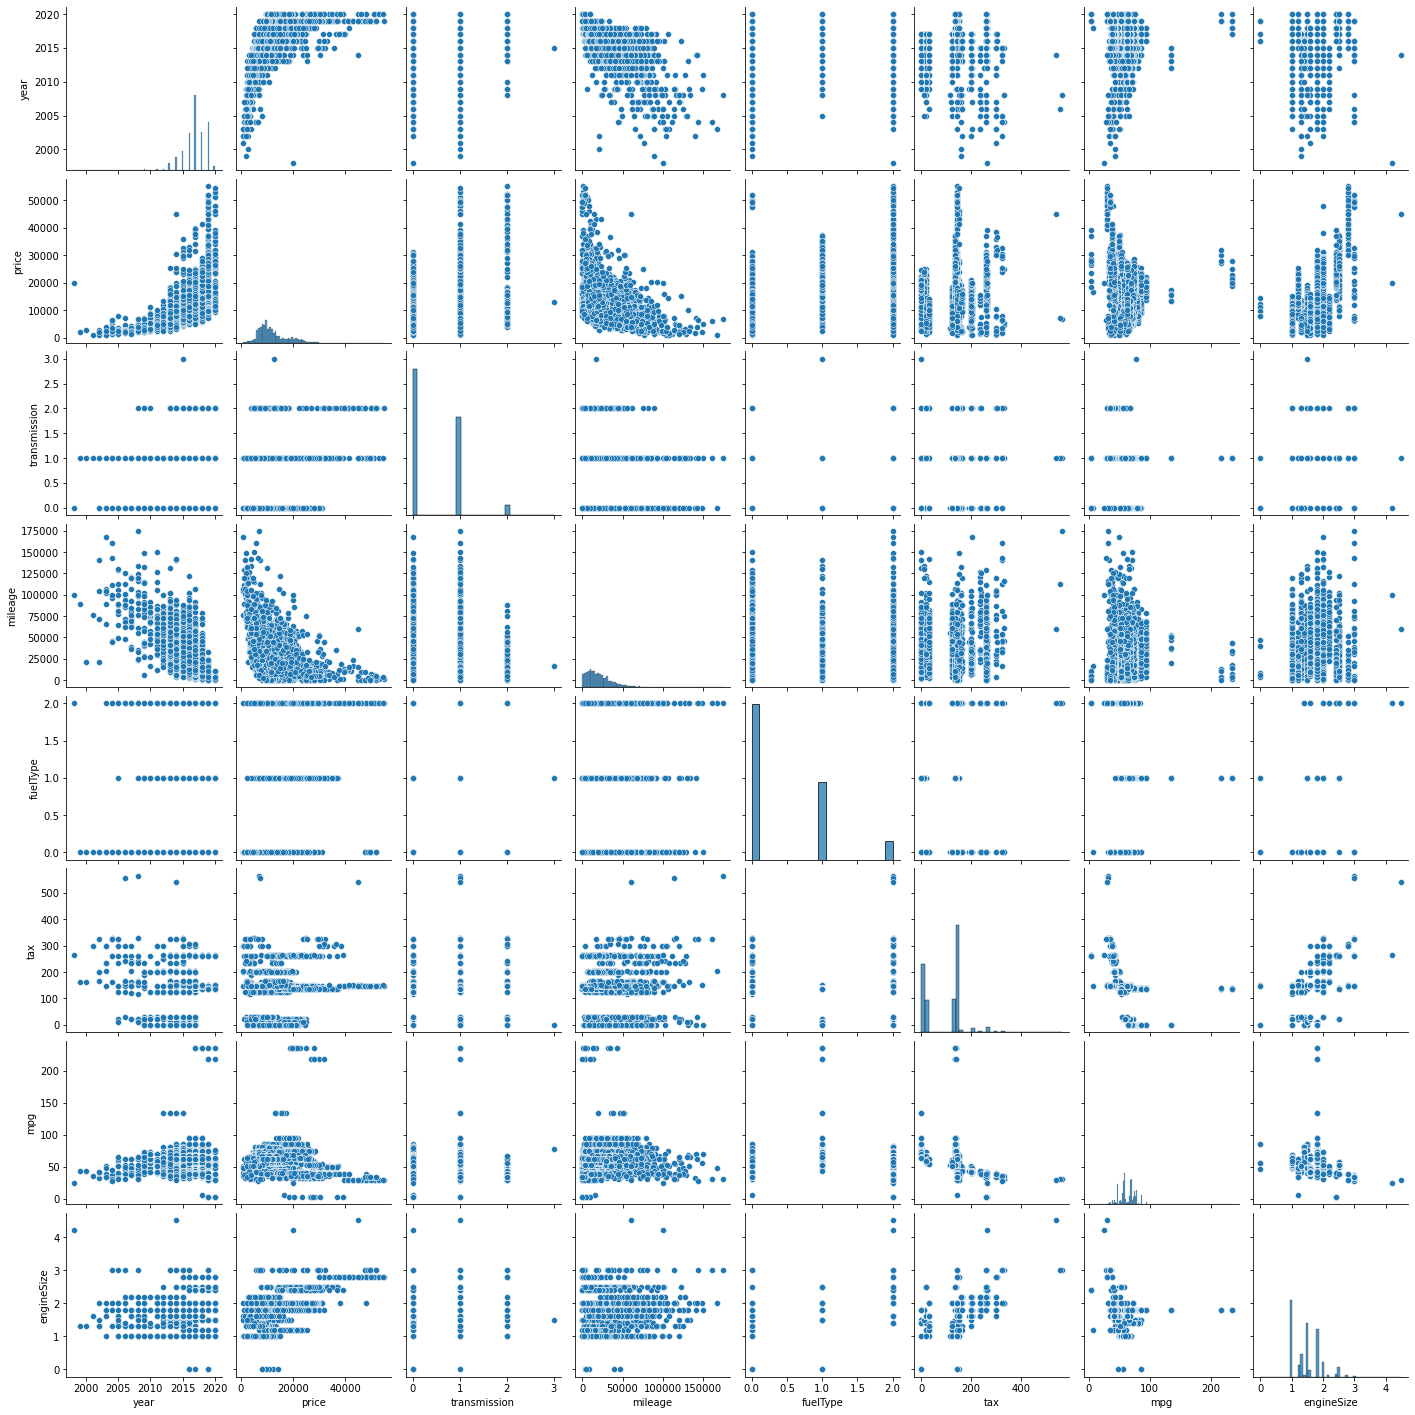

In [17]:
# HISTOGRAMS

sns.pairplot(df_c)

In [18]:
# SVM

from sklearn.svm import SVC

svc_model = SVC(kernel = 'rbf')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)

print('Confusion matrix: ', confusion_matrix(y_test,prediction))
print('Score: ', accuracy_score(y_test,prediction))


Confusion matrix:  [[2065    4    1]
 [   2  992    2]
 [  13    0  238]]
Score:  0.9933675007536931


In [19]:
# SVM WITH PARAMETERS

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','sigmoid','linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

grid_prediction = grid.predict(X_test)
print('Confusion matrix: ', confusion_matrix(y_test, grid_prediction))
print('Score: ', accuracy_score(y_test, prediction))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, k

Confusion Matrix:  [[2061    4    5]
 [  16  979    1]
 [   9    0  242]]
Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2070
           1       1.00      0.98      0.99       996
           2       0.98      0.96      0.97       251

    accuracy                           0.99      3317
   macro avg       0.99      0.98      0.98      3317
weighted avg       0.99      0.99      0.99      3317



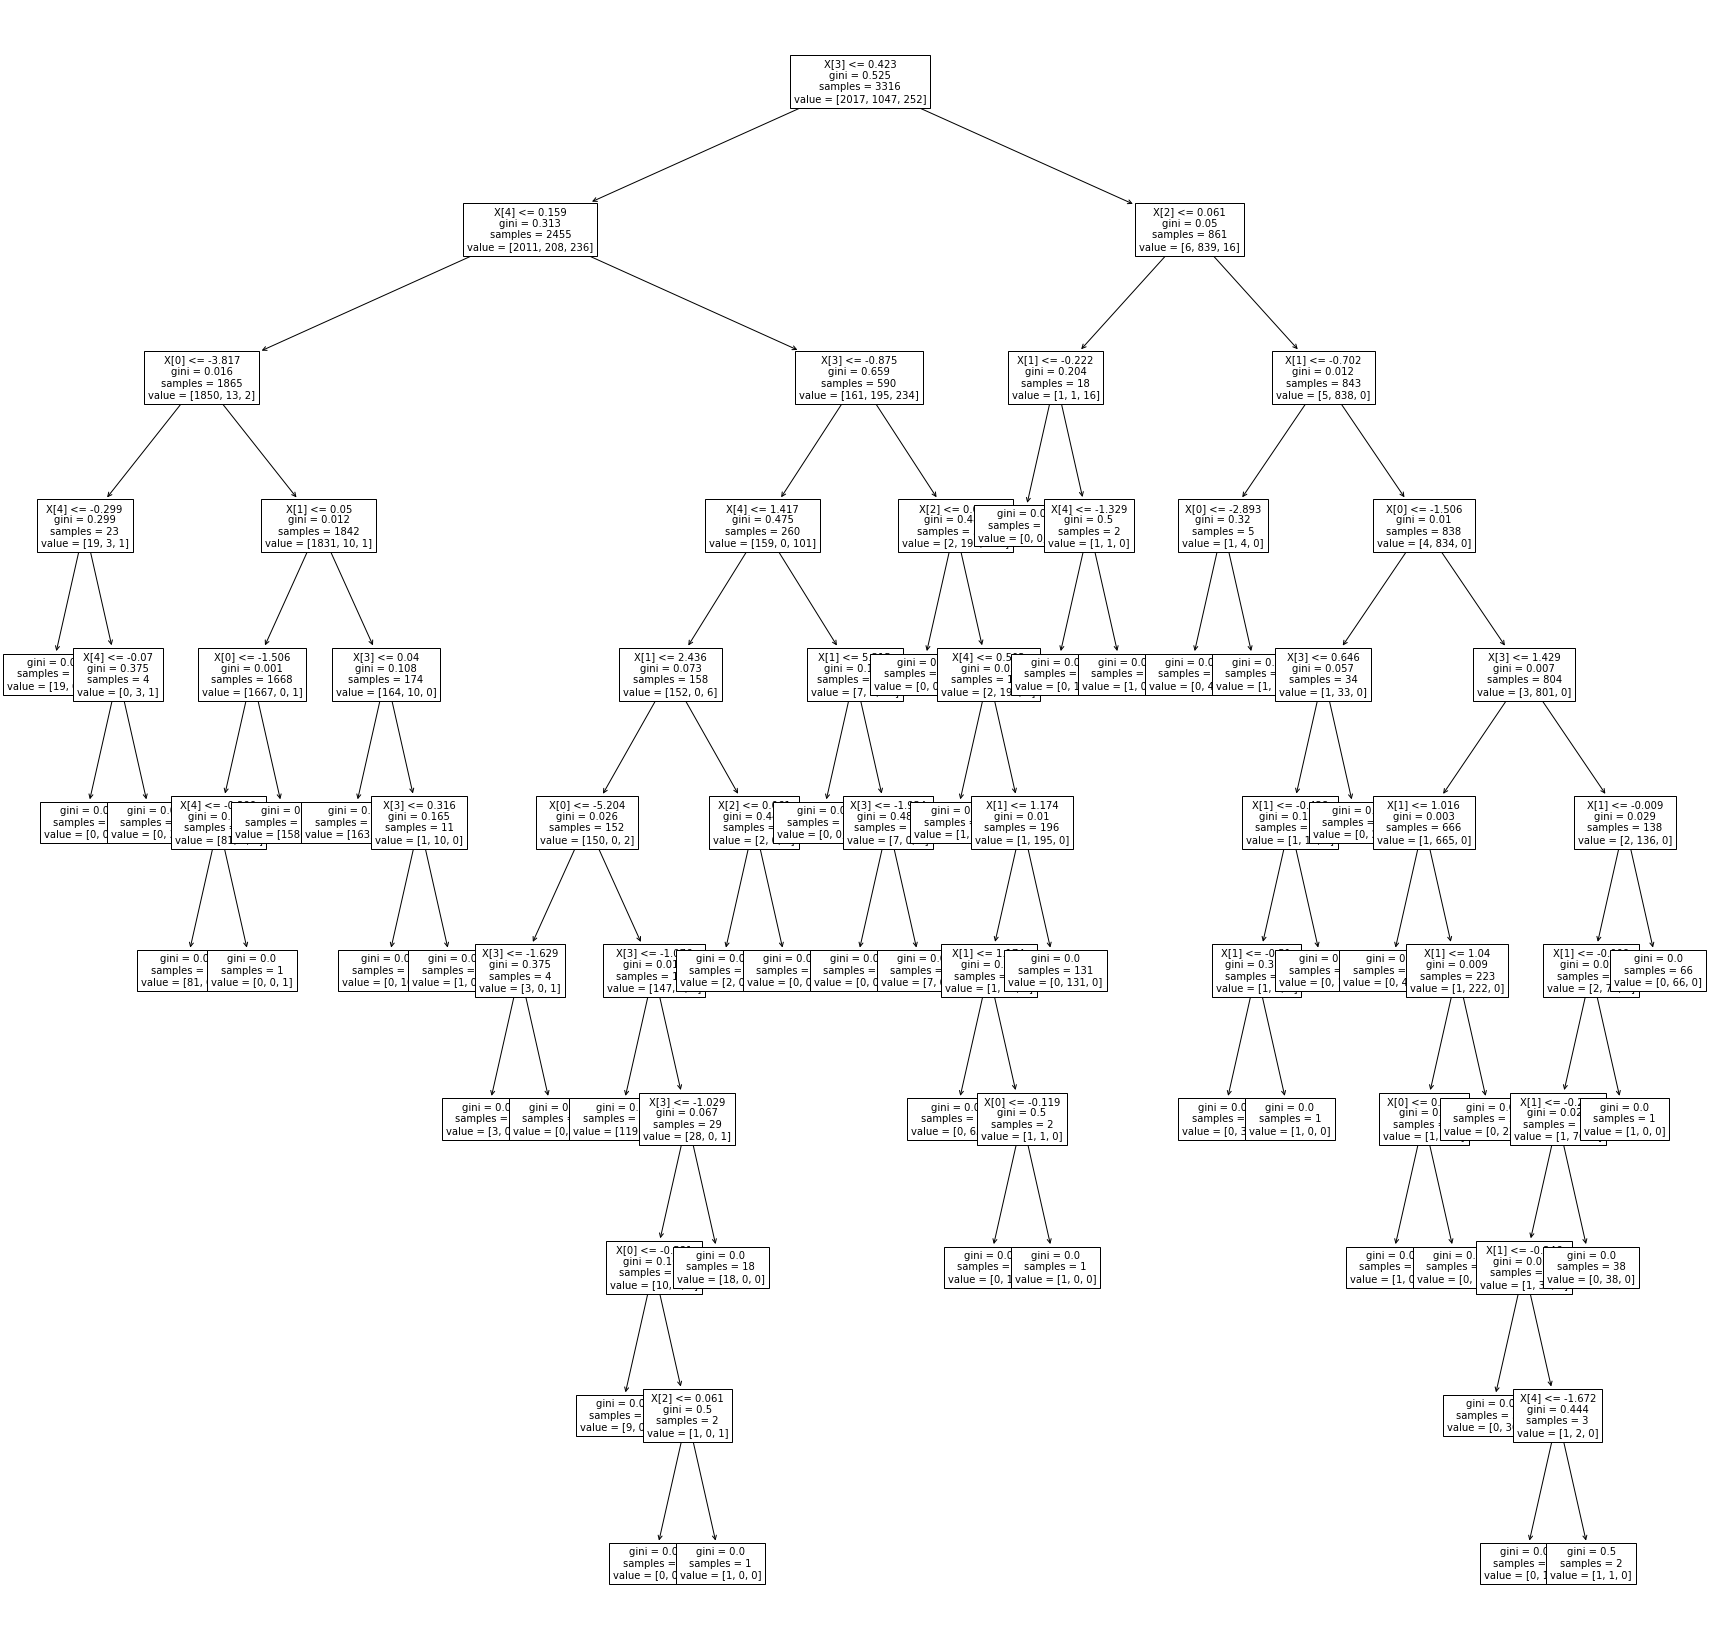

In [21]:
# DECISION TREE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
clf = dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print('Confusion Matrix: ' ,confusion_matrix(y_test, predictions))
print('Classification report: ' ,classification_report(y_test, predictions, zero_division=1))

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, fontsize=10)
plt.show()


In [22]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)
predictions = CV_rfc.predict(X_test)

print(CV_rfc.best_params_)
print('Confusion Matrix: ' ,confusion_matrix(y_test, predictions))
print('Classification report: ' ,classification_report(y_test, predictions, zero_division=1))

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Confusion Matrix:  [[2064    4    2]
 [   1  995    0]
 [   8    0  243]]
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2070
           1       1.00      1.00      1.00       996
           2       0.99      0.97      0.98       251

    accuracy                           1.00      3317
   macro avg       0.99      0.99      0.99      3317
weighted avg       1.00      1.00      1.00      3317



In [42]:
# ADABOOST

crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)

for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train, y_train).tree_.max_depth < depth:
        break
    score=np.mean(cross_val_score(tree_classifier, X_train, y_train, scoring='accuracy', cv=crossvalidation, n_jobs=1))
    print(depth, score)

param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

ada = AdaBoostClassifier()
search_ada = GridSearchCV(estimator=ada,param_grid=param_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search_ada.fit(X_train, y_train)

print(search_ada.best_params_)
print(search_ada.best_score_)


1 0.859471117096786
2 0.886006260692316
3 0.9221981581916789
4 0.9885442070396389
5 0.9915571652167582
6 0.9921595748553125
7 0.9903514359553016
8 0.990353255923998
9 0.9897508462854437
{'learning_rate': 0.01, 'n_estimators': 2000}
0.9375696138026426


In [44]:
print(np.mean(cross_val_score(ada,X_train,y_train,scoring='accuracy',cv=crossvalidation,n_jobs=1)))

0.8959250900884503


In [5]:
clf = AdaBoostClassifier(n_estimators=2000, learning_rate=0.01)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('Confusion Matrix: ' ,confusion_matrix(y_test, predictions))
print('Classification report: ' ,classification_report(y_test, predictions, zero_division=1))

Confusion Matrix:  [[1978   13   79]
 [   4  992    0]
 [  82    0  169]]
Classification report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96      2070
           2       0.99      1.00      0.99       996
           3       0.68      0.67      0.68       251

    accuracy                           0.95      3317
   macro avg       0.88      0.87      0.88      3317
weighted avg       0.95      0.95      0.95      3317



In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# kNN

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)

pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[2060    5    5]
 [   2  992    2]
 [  12    1  238]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2070
           1       0.99      1.00      0.99       996
           2       0.97      0.95      0.96       251

    accuracy                           0.99      3317
   macro avg       0.99      0.98      0.98      3317
weighted avg       0.99      0.99      0.99      3317

0.9918601145613506


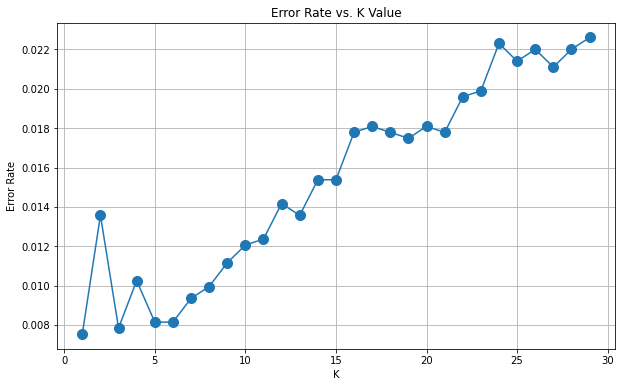

In [25]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[2060    5    5]
 [   2  992    2]
 [  12    1  238]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2070
           1       0.99      1.00      0.99       996
           2       0.97      0.95      0.96       251

    accuracy                           0.99      3317
   macro avg       0.99      0.98      0.98      3317
weighted avg       0.99      0.99      0.99      3317

